<a href="https://colab.research.google.com/github/MOHANAPRIYAAIDS/Senti_analysis_Amazon_Products/blob/main/Senti_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [1]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv('/Amazon_Unlocked_Mobile (1).csv',encoding='ISO-8859-1')
df.head()

<ipython-input-3-902c8c46db93>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Amazon_Unlocked_Mobile (1).csv',encoding='ISO-8859-1')


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Summary statistics of numerical features : \n", df.describe())
print("\nTotal number of reviews: ",len(df))
print("\nTotal number of brands: ", len(list(set(df['Brand Name']))))
print("\nTotal number of unique products: ", len(list(set(df['Product Name']))))


Summary statistics of numerical features : 
               Price        Rating  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
count  35944.000000  37558.000000         2.0         0.0         0.0   
mean     188.015312      3.701076         0.0         NaN         NaN   
std      124.630357      1.643468         0.0         NaN         NaN   
min       17.950000      1.000000         0.0         NaN         NaN   
25%      115.000000      2.000000         0.0         NaN         NaN   
50%      159.990000      5.000000         0.0         NaN         NaN   
75%      224.770000      5.000000         0.0         NaN         NaN   
max     2000.000000      5.000000         0.0         NaN         NaN   

       Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
count         0.0          0.0          0.0          0.0          0.0   
mean          NaN          NaN          NaN          NaN          NaN   
std           NaN          NaN          NaN          NaN          NaN   
min  

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

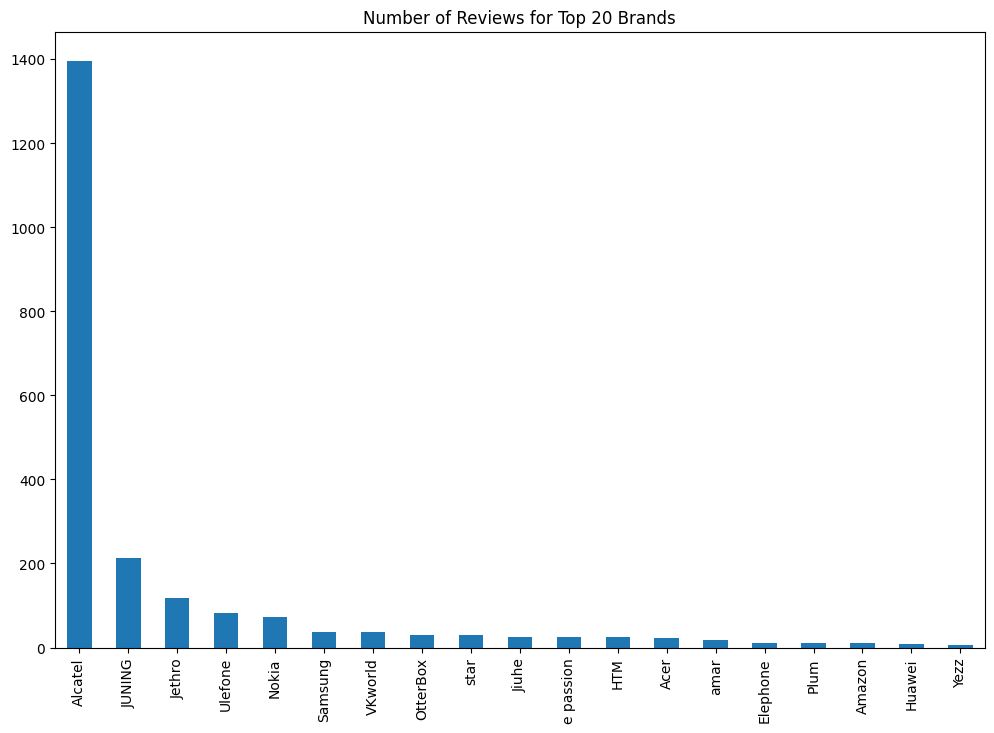

In [11]:
# Plot number of reviews for top 20 brands
brands = df["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[1:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")


In [12]:
# Drop missing value and unnamed columns
# Drop missing value and unnamed columns
res = df.dropna(axis=1, how='all')
res = res.loc[:, ~res.columns.str.contains('^Unnamed')]

# Create labels based on Rating column
labels = []
for cell in res['Rating']:
    if str(cell) >= str('4'):
        labels.append('2')  # Good
    elif str(cell) == str('3'):
        labels.append('1')  # Neutral
    else:
        labels.append('0')  # Poor

# Add Label column and remove Review Votes and Rating columns
res['Label'] = labels
res.drop(['Review Votes', 'Rating'], axis=1, inplace=True)

res.head()




,Product Name,Brand Name,Price,Reviews,Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,I feel so LUCKY to have found this used (phone...,2
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,"nice phone, nice up grade from my pantach revu...",2
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Very pleased,2
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,It works good but it goes slow sometimes but i...,2
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Great phone to replace my lost phone. The only...,2


In [16]:
from sklearn.model_selection import train_test_split
# Split data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(res['Reviews'], res['Label'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[5496])



Load 33803 training examples and 3756 validation examples. 

Show a review in the training set : 
 I bought the phone for my son and soon as we got it he was having trouble charging it when i took it to be looked at. come to find out i bought a phone and the battery was no good the battery was permanently damage.


In [17]:
import math
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    if isinstance(raw_text, float) and math.isnan(raw_text): # handle NaN values
        return ""
    
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return words
    
    return " ".join(words)


In [19]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []
#print(df_results['Country'].apply(lambda x: 0 if pd.isna(x) else len(x)))
for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',X_train_cleaned[5496])
for d in X_test:
    X_test_cleaned.append(cleanText(d))


<ipython-input-17-abc2ff84cbfb>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
<ipython-input-17-abc2ff84cbfb>:9: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html


Show a cleaned review in the training set : 
 i bought the phone for my son and soon as we got it he was having trouble charging it when i took it to be looked at come to find out i bought a phone and the battery was no good the battery was permanently damage


CountVectorizer with Mulinomial Naive Bayes (Benchmark Model)

we first create a CountVectorizer object and transform the training data using the fit_transform() method. We then train a MultinomialNB classifier on the transformed training data.

Next, we transform the test data using the same vectorizer object using the transform() method. We then predict the labels for the test data using the trained MultinomialNB classifier and calculate the accuracy score using the accuracy_score() function from scikit-learn's metrics module.

After that, we calculate the confusion matrix using the confusion_matrix() function and print it.



**bold text**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Create CountVectorizer object and transform the training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_cleaned)

# Train the model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Transform the test data using the same vectorizer
X_test = vectorizer.transform(X_test_cleaned)

# Predict the labels for the test data
y_pred = mnb.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.924653887113951
Confusion Matrix:
[[1138  178]
 [ 105 2335]]


CounterVectorization with Logistic Regression
Some words might frequently appear but have little meaningful information about the sentiment of a particular review. 


# New Section

In the code, we first import the necessary packages such as CountVectorizer for vectorizing the text data, LogisticRegression for training a logistic regression model, and accuracy_score and confusion_matrix for evaluating the performance of the model.

We then create an instance of the CountVectorizer class with a min_df parameter of 5, which specifies that we only want to consider terms that occur in at least 5 documents.

Next, we fit the vectorizer to the training data using the fit_transform method to create a sparse matrix of term frequency counts for each document in the training set. We also use the transform method to convert the test data into a similar matrix.

We then create an instance of the LogisticRegression class and fit it to the training data using the fit method.

Finally, we make predictions on the test set using the predict method and calculate the accuracy of the model using the accuracy_score function. We also compute the confusion matrix using the confusion_matrix function to evaluate the performance of the model in more detail.



**bold text**

In [21]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert input data to string
X_train_str = np.array([str(text) for text in X_train])
X_test_str = np.array([str(text) for text in X_test])

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(min_df=5)
X_train_vectorized = vectorizer.fit_transform(X_train_str)
X_test_vectorized = vectorizer.transform(X_test_str)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train_vectorized, y_train)

# Make predictions on the test set and calculate accuracy
y_pred = lr.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Accuracy: 0.9414270500532481
Confusion matrix:
 [[1185  131]
 [  89 2351]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Building a pipeline
estimators = [("count", CountVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)

# Grid search
params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
          "count__min_df": [1, 3], #min count of words 
          "count__max_features": [1000, None], #max features
          "count__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
          "count__stop_words": [None, "english"]} #use stopwords or don't

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)

# Evaluate on the validaton set
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate on the validation set
predictions = grid.predict(X_test_cleaned)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The best paramenter set is : 
 {'count__max_features': None, 'count__min_df': 1, 'count__ngram_range': (1, 2), 'count__stop_words': None, 'lr__C': 10}
Accuracy: 0.9747071352502662
Confusion Matrix:
[[1266   50]
 [  45 2395]]


In [23]:
import joblib

# Train your model and get the best hyperparameters using GridSearchCV
...

# Fit the model using the best hyperparameters
model = Pipeline([
    ("count", CountVectorizer(max_features=None, min_df=1, ngram_range=(1,2), stop_words=None)),
    ("lr", LogisticRegression(C=10))
])
model.fit(X_train_cleaned, y_train)

# Evaluate the model on the validation set
predictions = model.predict(X_test_cleaned)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Save the model using joblib
joblib.dump(model, "sentiment_analysis_model.joblib")


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9747071352502662


['sentiment_analysis_model.joblib']